<a href="https://colab.research.google.com/github/Vothuw/homeworkAl/blob/main/2_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install scikit-fuzzy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 9.6 MB/s eta 0:00:00


4.212657584550569


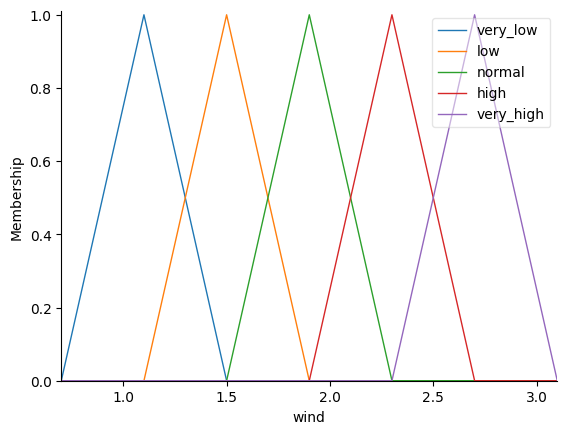

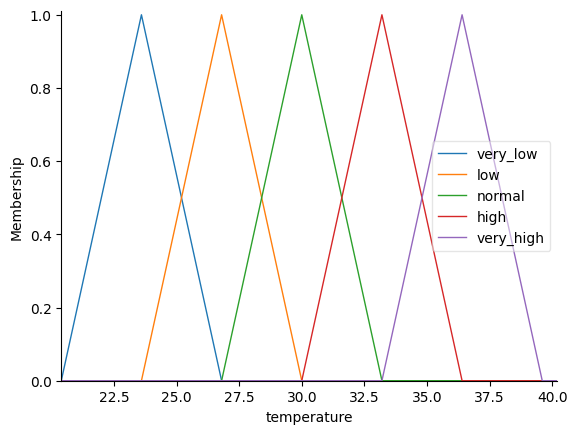

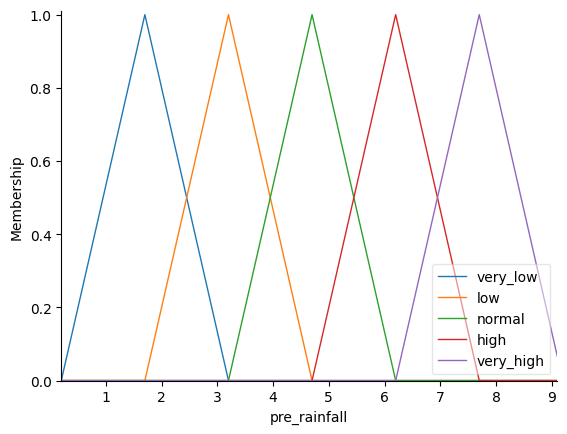

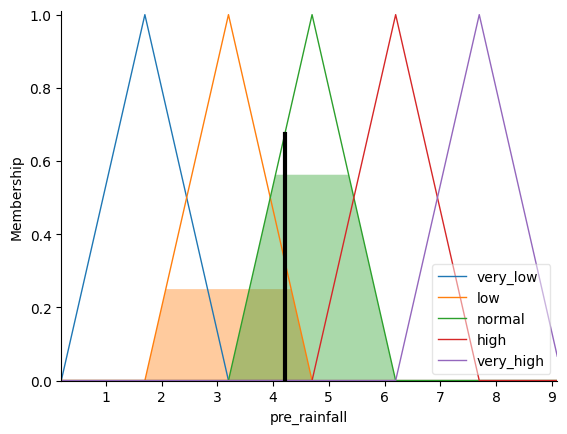

In [2]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

wind=ctrl.Antecedent(np.arange(0.7,3.2,0.1),'wind')
temperature=ctrl.Antecedent(np.arange(20.4,40.3,0.1),'temperature')
pre_rainfall=ctrl.Consequent(np.arange(0.2,9.2,0.1),'pre_rainfall')

wind['very_low']=fuzz.trimf(wind.universe,[0.7,1.1,1.5])
wind['low']=fuzz.trimf(wind.universe,[1.1,1.5,1.9])
wind['normal']=fuzz.trimf(wind.universe,[1.5,1.9,2.3])
wind['high']=fuzz.trimf(wind.universe,[1.9,2.3,2.7])
wind['very_high']=fuzz.trimf(wind.universe,[2.3,2.7,3.1])

temperature['very_low']=fuzz.trimf(temperature.universe,[20.4,23.6,26.8])
temperature['low']=fuzz.trimf(temperature.universe,[23.6,26.8,30])
temperature['normal']=fuzz.trimf(temperature.universe,[26.8,30,33.2])
temperature['high']=fuzz.trimf(temperature.universe,[30,33.2,36.4])
temperature['very_high']=fuzz.trimf(temperature.universe,[33.2,36.4,39.6])

pre_rainfall['very_low']=fuzz.trimf(pre_rainfall.universe,[0.2,1.7,3.2])
pre_rainfall['low']=fuzz.trimf(pre_rainfall.universe,[1.7,3.2,4.7])
pre_rainfall['normal']=fuzz.trimf(pre_rainfall.universe,[3.2,4.7,6.2])
pre_rainfall['high']=fuzz.trimf(pre_rainfall.universe,[4.7,6.2,7.7])
pre_rainfall['very_high']=fuzz.trimf(pre_rainfall.universe,[6.2,7.7,9.2])

wind.view()
temperature.view()
pre_rainfall.view()


rule1=ctrl.Rule(wind['very_low']&temperature['very_low'],pre_rainfall['very_low'])
rule2=ctrl.Rule(wind['very_low']&temperature['low'],pre_rainfall['very_low'])
rule3=ctrl.Rule(wind['very_low']&temperature['normal'],pre_rainfall['low'])
rule4=ctrl.Rule(wind['very_low']&temperature['high'],pre_rainfall['low'])
rule5=ctrl.Rule(wind['very_low']&temperature['very_high'],pre_rainfall['low'])
rule6=ctrl.Rule(wind['low']&temperature['very_low'],pre_rainfall['very_low'])
rule7=ctrl.Rule(wind['low']&temperature['low'],pre_rainfall['low'])
rule8=ctrl.Rule(wind['low']&temperature['normal'],pre_rainfall['low'])
rule9=ctrl.Rule(wind['low']&temperature['high'],pre_rainfall['normal'])
rule10=ctrl.Rule(wind['low']&temperature['very_high'],pre_rainfall['normal'])
rule11=ctrl.Rule(wind['normal']&temperature['very_low'],pre_rainfall['low'])
rule12=ctrl.Rule(wind['normal']&temperature['low'],pre_rainfall['low'])
rule13=ctrl.Rule(wind['normal']&temperature['normal'],pre_rainfall['normal'])
rule14=ctrl.Rule(wind['normal']&temperature['high'],pre_rainfall['normal'])
rule15=ctrl.Rule(wind['normal']&temperature['very_high'],pre_rainfall['normal'])
rule16=ctrl.Rule(wind['high']&temperature['very_low'],pre_rainfall['normal'])
rule17=ctrl.Rule(wind['high']&temperature['low'],pre_rainfall['normal'])
rule18=ctrl.Rule(wind['high']&temperature['normal'],pre_rainfall['normal'])
rule19=ctrl.Rule(wind['high']&temperature['high'],pre_rainfall['high'])
rule20=ctrl.Rule(wind['high']&temperature['very_high'],pre_rainfall['high'])
rule21=ctrl.Rule(wind['very_high']&temperature['very_low'],pre_rainfall['normal'])
rule22=ctrl.Rule(wind['very_high']&temperature['low'],pre_rainfall['normal'])
rule23=ctrl.Rule(wind['very_high']&temperature['normal'],pre_rainfall['high'])
rule24=ctrl.Rule(wind['very_high']&temperature['high'],pre_rainfall['very_high'])
rule25=ctrl.Rule(wind['very_high']&temperature['very_high'],pre_rainfall['very_high'])

rainfalling_ctrl=ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9,rule10,rule11,rule12,rule13,rule14,rule15,rule16,rule17,rule18,rule19,rule20,rule21,rule22,rule23,rule24,rule25])
rainfalling=ctrl.ControlSystemSimulation(rainfalling_ctrl)
rainfalling.input['wind']=2.2
rainfalling.input['temperature']=28.6
rainfalling.compute()
print(rainfalling.output['pre_rainfall'])
pre_rainfall.view(sim=rainfalling)